# Analysing the movie ratings on Fandango.com

In October 2015, data journalist Walt Hickey analysed movie ratings and discovered strong evidence to suggest that Fandango's rating system was biased. He compared the visible user ratings to the ones he scrapped from the HTML and noticed some discrepancy. He published the full article here: https://fivethirtyeight.com/features/fandango-movies-ratings/


In this Project, I want to analyse more recent movie ratings data to determine whether there has been any change in Fandango's rating after Hickey's analysis.

#### Examining and loading the data into a Pandas DataFrame

In [1]:
import pandas as pd 
import numpy as np

# Reading the datasets
fandango_1415 = pd.read_csv('fandango_score_comparison.csv') # Dataset that Hickey analysed 

fandango_1617 = pd.read_csv('movie_ratings_16_17.csv') # Datadet for 2016-2017



In [4]:
# Looking at the data Hickey scrapped
#fandango_1415.info()
fandango_1415.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


From the info above I can see that there are:
- 15 columns with the float64 pandas data type
- 6 columns with the int64 pandas data type
- 1 column with the object pandas data type

From this, I can see that we have 22 columns.

In [4]:
fandango_1415.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
# Looking at the more recent data

fandango_1617.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


From the info above, 
- 10 of the columns are float pandas data type
- 4 of the columns are int64 pandas data type
- 1 of the columns is an obaject pandas data type

In [6]:
fandango_1617.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [7]:
# Isolating the columns thst offer information about fandango's ratings

new_fandango1415 = fandango_1415[['FILM','Fandango_Stars', 'Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']]

new_fandango1617 = fandango_1617[['movie','year','fandango']]


In [8]:
new_fandango1415

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


In [9]:
new_fandango1617

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5


### Defining the population and sample for this analysis.
The population are movie ratings with at least 30 user reviews. 

##Don't understand the population we are interested in

The data used was sampled using the cluster sampling, this is because movies with high enough ratings were selected then out of those the final movies were selected randomly

### Changing the goal of our analysis

### Isolating the samples I need

I want to check for sample points (i.e movies) with over 30 fan ratings on fandango's website.

- For the fandango_1415 dataset ( which is the ones from hickey's analysis) I can use the "fandango_votes" column to isolate the sample points I need.

- For the fandango_1617 dataset (which was scrappped after Hickey's analysis) I can use the "metascore" column to isolate the sample points I need.

Before, continuing the analysis, I want to the following to both data sets:
1. Isolate the movies released in 2015 in a separate data set.

2. Isolate the movies released in 2016 in another separate data set.


In [42]:
# From the fandango_1415 dataset, to get the release date of the movie I have to apply
# the Series.str method to get years and then convert them to int64 data type.

date_fandango_1415 = fandango_1415['FILM'].str[-5:-1]
date_fandango_1415.astype('int64', errors = 'ignore')
fandango_1415['Year'] = date_fandango_1415
date_fandango_1415.dtype
# This gives a pandas series of the years.

dtype('O')

In [11]:
date_fandango_1415.dtype

dtype('O')

### Comparing Distribution Shapes for 2015 and 2016
Recall that the goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

There are many ways to go about with our analysis, but I will start simple by making a high-level comparison between the shapes of the distributions of movie ratings for both samples.



For the hickey's dataset I'd use the "Fandango_Stars", "Metacritic_norm_round", "IMDB_norm_round" and "RT_norm_round" columns to get the movie ratings for each site.

For the new dataset, I'd use the "fandango", "nr_metascore", "nr_imdb" and "nr_tmeter"  columns to get the movie ratings for each site.

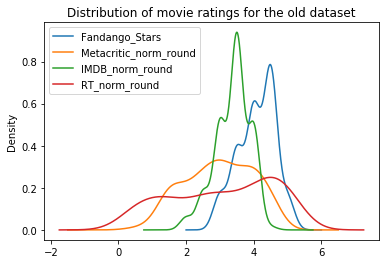

In [35]:
fandango_1415[['Fandango_Stars','Metacritic_norm_round','IMDB_norm_round', 'RT_norm_round']].plot.kde(title = 'Distribution of movie ratings for the old dataset')



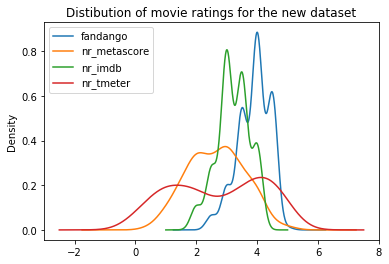

In [41]:
fandango_1617[['fandango','nr_metascore','nr_imdb','nr_tmeter']].plot.kde(title='Distibution of movie ratings for the new dataset')

Analyzing boths plots